In [21]:
# 匯入必要模組
import pandas as pd # Pandas :處理和分析表格資料 (例如 CSV 或 TSV 檔案) 的強大工具
import matplotlib.pyplot as plt # Matplotlib :繪圖函式庫。其中的 pyplot 模組提供了類似 MATLAB 的繪圖介面，可以創建各種靜態、動態、互動式圖表
from scipy.ndimage import gaussian_filter1d # 從 SciPy 函式庫的 ndimage 子模組中，匯入特定的 gaussian_filter1d 函數，用來執行高斯平滑
import numpy as np # 匯入 NumPy 函式庫

In [22]:
# 整理183GHz water maser的資料
file_path = "cube_Band5a_182.51-184.39GHz-017.fits-Z-profile-Region_1-Statistic_Mean-Coordinate_Current-2025-07-10-13-15-54.tsv"
df = pd.read_csv(file_path, sep="\t", skiprows=6) # 用 pandas 函式庫來讀取 TSV 檔案 (df=dataframe)
df.columns = [col.strip().lstrip("#").strip() for col in df.columns] #每個欄位名稱都去除前後空白和#符號

# 將 DataFrame 的前兩個欄位轉換為數值型別
df[df.columns[0]] = pd.to_numeric(df[df.columns[0]], errors='coerce') # 取得 DataFrame 的第一個欄位的名稱
df[df.columns[1]] = pd.to_numeric(df[df.columns[1]], errors='coerce') # 取得 DataFrame 的第二個欄位的名稱
df = df.dropna()  # Pandas 用來將資料轉換為數值型別的函數

x = df[df.columns[0]]
y = df[df.columns[1]] 

In [23]:
#define binning & boxcar smoothing
def boxcar_smooth(y, kernel_size): #定義一個名為 boxcar_smooth 的函數，接收 y:強度值&kernel_size:平滑點數 這兩個數值
    kernel = np.ones(kernel_size)/kernel_size #創建一個稱為 kernel 的平滑核 (smoothing kernel)。
    #首先，np.ones(kernel_size): 創建一個長度為 kernel_size 的 NumPy 陣列，其中所有元素都是 1
    #/ kernel_size :將陣列中的每個元素除以 kernel_size，所以核的總和為 1，而「核」代表了每個點的「權重」
    
    return np.convolve(y, kernel, mode="same") #執行實際的平滑操作
    #np.convolve(): NumPy 中的一個函數，用於執行「一維捲積(1D convolution)」:將一函數與另一函數混合(這裡是y&kernel)

def rebin_spectrum(x, y, bin_size):
    x = np.array(x)
    y = np.array(y)
    n_bins = len(y) // bin_size
    x = x[:n_bins * bin_size]
    y = y[:n_bins * bin_size]
    x_binned = x.reshape(n_bins, bin_size).mean(axis=1)
    y_binned = y.reshape(n_bins, bin_size).mean(axis=1)
    return x_binned, y_binned

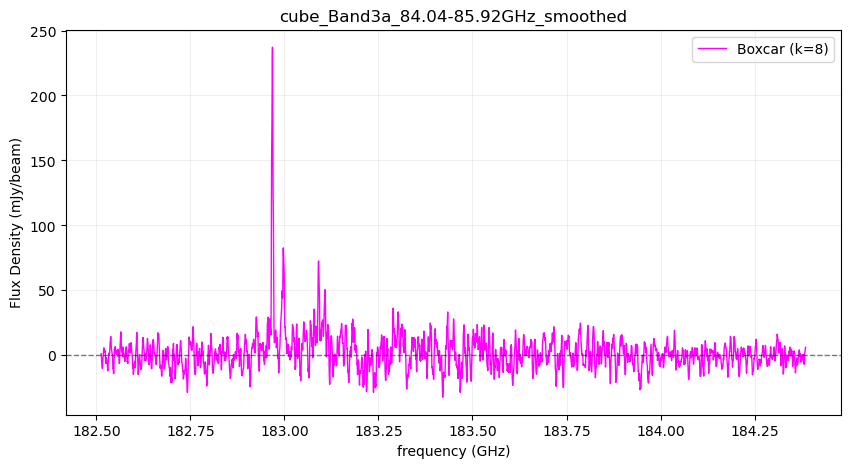

In [24]:
#smoothed data
x_binned, y_binned = rebin_spectrum(x, y, bin_size=1)
y_binned_boxcar = boxcar_smooth(y_binned, kernel_size=8)
plt.figure(figsize=(10, 5))
plt.plot(x_binned, y_binned_boxcar, color="magenta", linewidth=1, label="Boxcar (k=8)")
plt.xlabel("frequency (GHz)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("cube_Band3a_84.04-85.92GHz_smoothed")
#plt.xlim(186.77,187.25)
#plt.ylim(-3.5,4) 
plt.axhline(0, color="black", linewidth=1, linestyle="--", alpha=0.5)
plt.grid(True, alpha=0.2)
plt.legend() 

In [25]:
#define binning & boxcar smoothing
def boxcar_smooth(y, kernel_size): #定義一個名為 boxcar_smooth 的函數，接收 y:強度值&kernel_size:平滑點數 這兩個數值
    kernel = np.ones(kernel_size)/kernel_size #創建一個稱為 kernel 的平滑核 (smoothing kernel)。
    #首先，np.ones(kernel_size): 創建一個長度為 kernel_size 的 NumPy 陣列，其中所有元素都是 1
    #/ kernel_size :將陣列中的每個元素除以 kernel_size，所以核的總和為 1，而「核」代表了每個點的「權重」
    
    return np.convolve(y, kernel, mode="same") #執行實際的平滑操作
    #np.convolve(): NumPy 中的一個函數，用於執行「一維捲積(1D convolution)」:將一函數與另一函數混合(這裡是y&kernel)

def rebin_spectrum(x, y, bin_size):
    x = np.array(x)
    y = np.array(y)
    n_bins = len(y) // bin_size
    x = x[:n_bins * bin_size]
    y = y[:n_bins * bin_size]
    x_binned = x.reshape(n_bins, bin_size).mean(axis=1)
    y_binned = y.reshape(n_bins, bin_size).mean(axis=1)
    return x_binned, y_binned

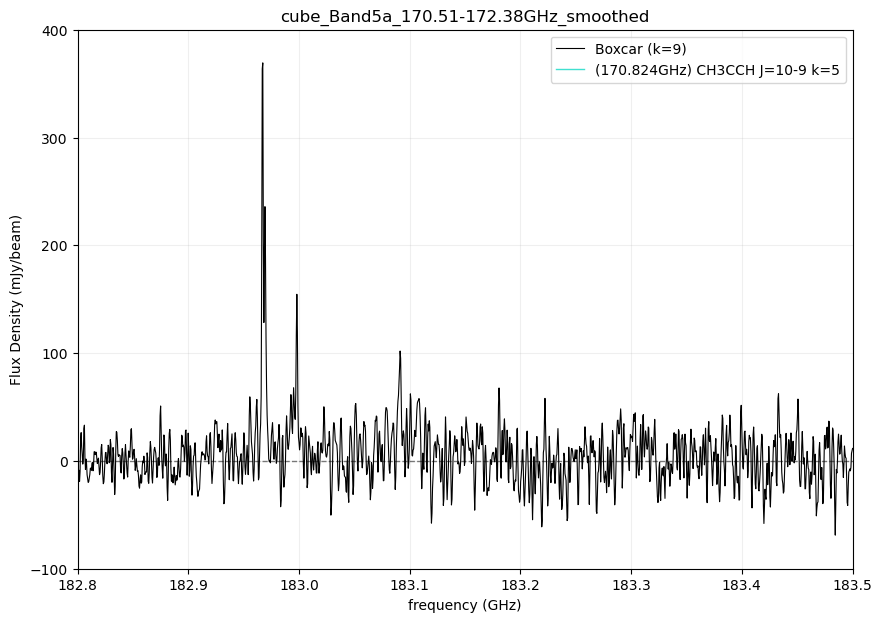

In [26]:
#plot spectral lines
x_binned, y_binned = rebin_spectrum(x, y, bin_size=1)
y_binned_boxcar = boxcar_smooth(y_binned, kernel_size=2)

plt.figure(figsize=(10, 7))
plt.plot(x_binned, y_binned_boxcar, color="black", linewidth=0.8, label="Boxcar (k=9)")
plt.xlabel("frequency (GHz)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("cube_Band5a_170.51-172.38GHz_smoothed")
plt.xlim(182.8,183.5)
plt.ylim(-100,400) 
plt.axhline(0, color="black", linewidth=1, linestyle="--", alpha=0.5)
plt.grid(True, alpha=0.2)
plt.legend()

my_lines = [
    (170.577, "(170.824GHz) CH3CCH J=10-9 k=5", "turquoise")
]
for freq, line_label, line_color in my_lines: #for迴圈，一次一次的把列表中的值賦給變數'freq, label, line_color'
    plt.axvline(freq, label=line_label, color=line_color, linewidth=1, linestyle="-", alpha=1) #axv=axis verticle
    plt.legend(loc="upper right")

In [27]:
# 整理資料
file_path = "cube_Band6a_232.17-234.04GHz.fits-Z-profile-Region_1-Statistic_Mean-Coordinate_Current-2025-07-24-14-25-22.tsv"
df = pd.read_csv(file_path, sep="\t", skiprows=6) # 用 pandas 函式庫來讀取 TSV 檔案 (df=dataframe)
df.columns = [col.strip().lstrip("#").strip() for col in df.columns] #每個欄位名稱都去除前後空白和#符號

# 將 DataFrame 的前兩個欄位轉換為數值型別
df[df.columns[0]] = pd.to_numeric(df[df.columns[0]], errors='coerce') # 取得 DataFrame 的第一個欄位的名稱
df[df.columns[1]] = pd.to_numeric(df[df.columns[1]], errors='coerce') # 取得 DataFrame 的第二個欄位的名稱
df = df.dropna()  # Pandas 用來將資料轉換為數值型別的函數

x = df[df.columns[0]]
y = df[df.columns[1]] * 1000

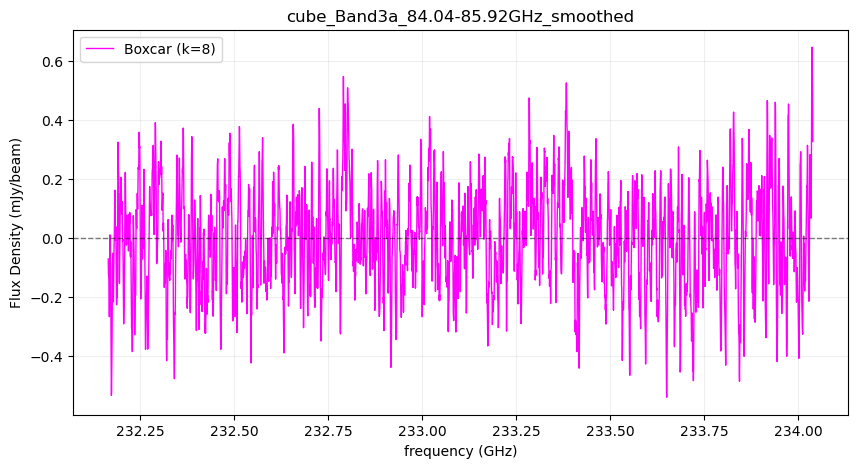

In [28]:
#smoothed data
x_binned, y_binned = rebin_spectrum(x, y, bin_size=1)
y_binned_boxcar = boxcar_smooth(y_binned, kernel_size=8)
plt.figure(figsize=(10, 5))
plt.plot(x_binned, y_binned_boxcar, color="magenta", linewidth=1, label="Boxcar (k=8)")
plt.xlabel("frequency (GHz)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("cube_Band3a_84.04-85.92GHz_smoothed")
#plt.xlim(186.77,187.25)
#plt.ylim(-3.5,4) 
plt.axhline(0, color="black", linewidth=1, linestyle="--", alpha=0.5)
plt.grid(True, alpha=0.2)
plt.legend() 

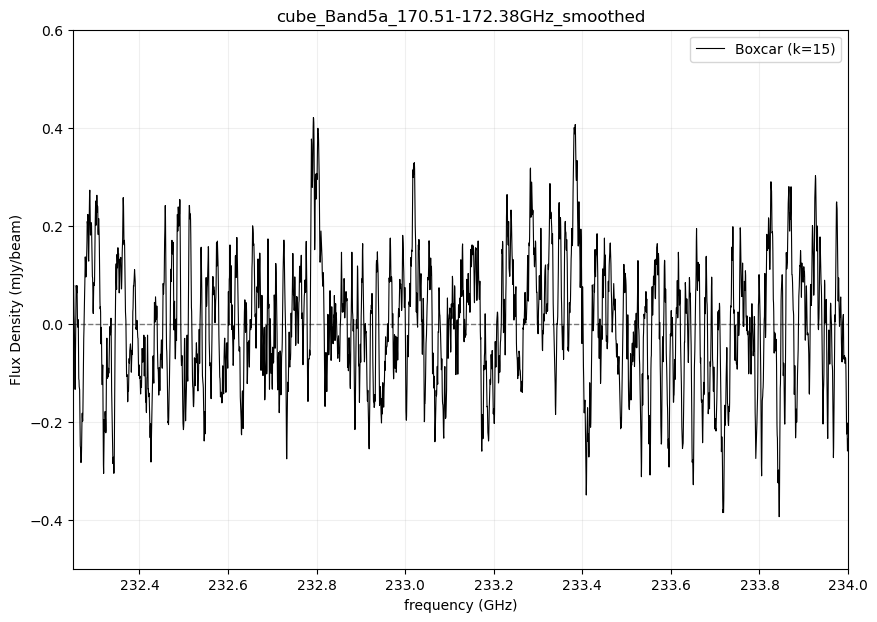

In [29]:
#plot spectral lines
x_binned, y_binned = rebin_spectrum(x, y, bin_size=1)
y_binned_boxcar = boxcar_smooth(y_binned, kernel_size=15)

plt.figure(figsize=(10, 7))
plt.plot(x_binned, y_binned_boxcar, color="black", linewidth=0.8, label="Boxcar (k=15)")
plt.xlabel("frequency (GHz)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("cube_Band5a_170.51-172.38GHz_smoothed")
plt.xlim(232.25,234)
plt.ylim(-0.5,0.6) 
plt.axhline(0, color="black", linewidth=1, linestyle="--", alpha=0.5)
plt.grid(True, alpha=0.2)
plt.legend()

In [30]:
#開始疊圖啦

# 整理183GHz water maser的資料
file_path = "cube_Band5a_182.51-184.39GHz-017.fits-Z-profile-Region_1-Statistic_Mean-Coordinate_Current-2025-07-10-13-15-54.tsv"
df = pd.read_csv(file_path, sep="\t", skiprows=6) # 用 pandas 函式庫來讀取 TSV 檔案 (df=dataframe)
df.columns = [col.strip().lstrip("#").strip() for col in df.columns] #每個欄位名稱都去除前後空白和#符號

# 將 DataFrame 的前兩個欄位轉換為數值型別
df[df.columns[0]] = pd.to_numeric(df[df.columns[0]], errors='coerce') # 取得 DataFrame 的第一個欄位的名稱
df[df.columns[1]] = pd.to_numeric(df[df.columns[1]], errors='coerce') # 取得 DataFrame 的第二個欄位的名稱
df = df.dropna()  # Pandas 用來將資料轉換為數值型別的函數

x = df[df.columns[0]]
y = df[df.columns[1]] 

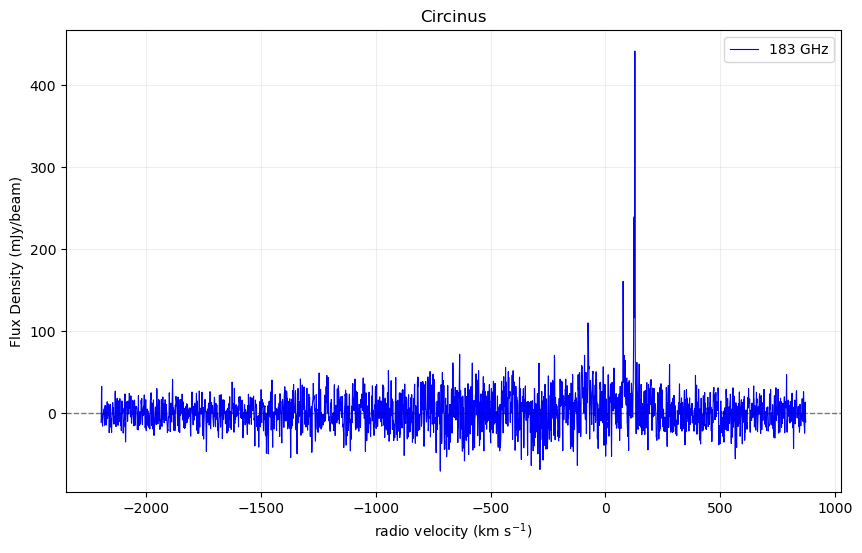

In [31]:
#先畫沒有smooth的圖

#定義參數，把x軸轉換為radio velocity
c = 299792.458  # 光速(km/s)
shifted_freq_183 = 183.045 #183.310/1.001448
v_radio_183 = c * (shifted_freq_183 - x )/ shifted_freq_183

plt.figure(figsize=(10, 6))
plt.plot(v_radio_183, y, color="blue", linewidth=0.8, label="183 GHz")
plt.xlabel("radio velocity (km s$^{-1}$)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("Circinus")
#plt.xlim(100,800)
#plt.ylim(-100,300) 
plt.axhline(0, color="black", linewidth=1, linestyle="--", alpha=0.5)
plt.grid(True, alpha=0.2)
plt.legend()

In [32]:
#define binning & boxcar smoothing
def boxcar_smooth(y, kernel_size): #定義一個名為 boxcar_smooth 的函數，接收 y:強度值&kernel_size:平滑點數 這兩個數值
    kernel = np.ones(kernel_size)/kernel_size #創建一個稱為 kernel 的平滑核 (smoothing kernel)。
    #首先，np.ones(kernel_size): 創建一個長度為 kernel_size 的 NumPy 陣列，其中所有元素都是 1
    #/ kernel_size :將陣列中的每個元素除以 kernel_size，所以核的總和為 1，而「核」代表了每個點的「權重」
    
    return np.convolve(y, kernel, mode="same") #執行實際的平滑操作
    #np.convolve(): NumPy 中的一個函數，用於執行「一維捲積(1D convolution)」:將一函數與另一函數混合(這裡是y&kernel)

def rebin_spectrum(v_radio_183, y, bin_size):
    v_radio_183 = np.array(v_radio_183)
    y = np.array(y)
    n_bins = len(y) // bin_size
    v_radio_183 = v_radio_183[:n_bins * bin_size]
    y = y[:n_bins * bin_size]
    v_radio_183_binned = v_radio_183.reshape(n_bins, bin_size).mean(axis=1)
    y_binned = y.reshape(n_bins, bin_size).mean(axis=1)
    return v_radio_183_binned, y_binned

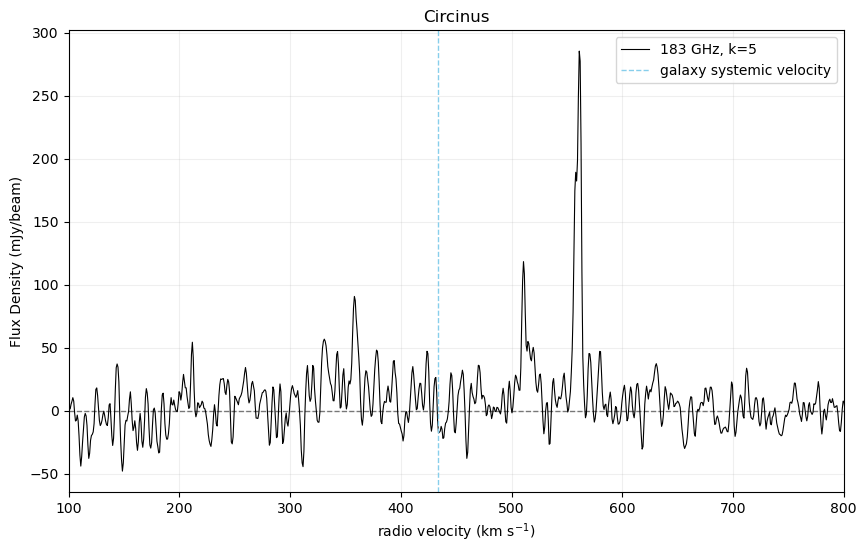

In [ ]:
v_radio_183_binned, y_binned = rebin_spectrum(v_radio_183, y, bin_size=1)
y_binned_boxcar = boxcar_smooth(y_binned, kernel_size=4)

plt.figure(figsize=(10, 6))
#注意這裡有把速率0點對齊星系速率
plt.plot(v_radio_183_binned + 434, y_binned_boxcar, color="black", linewidth=0.8, label="183 GHz, k=5")
plt.xlabel("radio velocity (km s$^{-1}$)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("Circinus")
plt.xlim(100,800)
#plt.ylim(100,800) 
plt.axhline(0, color="black", linewidth=1, linestyle="--", alpha=0.5)
plt.axvline(433.7, color="skyblue", linewidth=1, linestyle="--", alpha=1, label="galaxy systemic velocity" )
plt.grid(True, alpha=0.2)
plt.legend()



In [34]:
# 整理資料
file_path = "cube_Band6a_232.17-234.04GHz.fits-Z-profile-Region_1-Statistic_Mean-Coordinate_Current-2025-07-24-14-25-22.tsv"
df = pd.read_csv(file_path, sep="\t", skiprows=6) # 用 pandas 函式庫來讀取 TSV 檔案 (df=dataframe)
df.columns = [col.strip().lstrip("#").strip() for col in df.columns] #每個欄位名稱都去除前後空白和#符號

# 將 DataFrame 的前兩個欄位轉換為數值型別
df[df.columns[0]] = pd.to_numeric(df[df.columns[0]], errors='coerce') # 取得 DataFrame 的第一個欄位的名稱
df[df.columns[1]] = pd.to_numeric(df[df.columns[1]], errors='coerce') # 取得 DataFrame 的第二個欄位的名稱
df = df.dropna()  # Pandas 用來將資料轉換為數值型別的函數

a = df[df.columns[0]]
b = df[df.columns[1]] * 1000

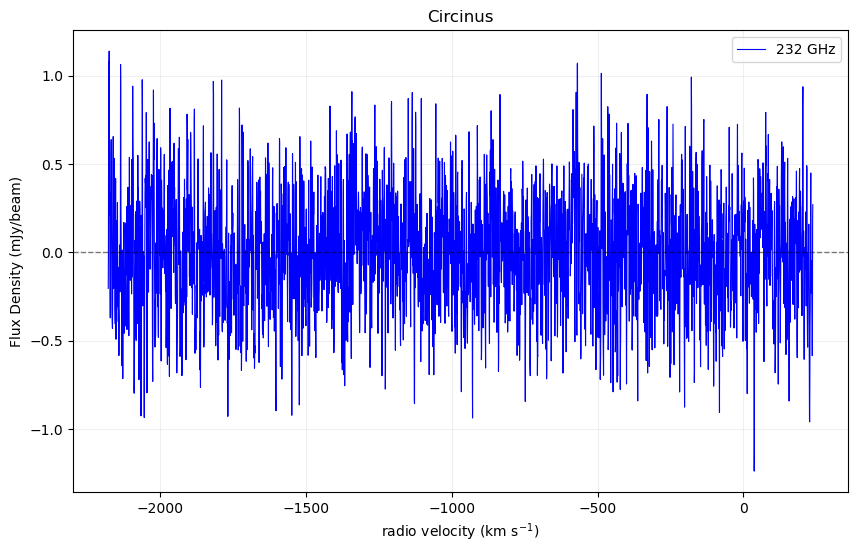

In [35]:
#先畫沒有smooth的圖

#定義參數，把x軸轉換為radio velocity
c = 299792.458  # 光速(km/s)
shifted_freq_232 = 232.35 #232.687/1.001448
v_radio_232 = c * (shifted_freq_232 - a )/ shifted_freq_232

plt.figure(figsize=(10, 6))
plt.plot(v_radio_232, b, color="blue", linewidth=0.8, label="232 GHz")
plt.xlabel("radio velocity (km s$^{-1}$)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("Circinus")
#plt.xlim(100,800)
#plt.ylim(-100,300) 
plt.axhline(0, color="black", linewidth=1, linestyle="--", alpha=0.5)
plt.grid(True, alpha=0.2)
plt.legend()

In [36]:
#define binning & boxcar smoothing
def boxcar_smooth(b, kernel_size): #定義一個名為 boxcar_smooth 的函數，接收 y:強度值&kernel_size:平滑點數 這兩個數值
    kernel = np.ones(kernel_size)/kernel_size #創建一個稱為 kernel 的平滑核 (smoothing kernel)。
    #首先，np.ones(kernel_size): 創建一個長度為 kernel_size 的 NumPy 陣列，其中所有元素都是 1
    #/ kernel_size :將陣列中的每個元素除以 kernel_size，所以核的總和為 1，而「核」代表了每個點的「權重」
    
    return np.convolve(b, kernel, mode="same") #執行實際的平滑操作
    #np.convolve(): NumPy 中的一個函數，用於執行「一維捲積(1D convolution)」:將一函數與另一函數混合(這裡是y&kernel)

def rebin_spectrum(v_radio_232, b, bin_size):
    v_radio_232 = np.array(v_radio_232)
    b = np.array(b)
    n_bins = len(b) // bin_size
    v_radio_232 = v_radio_232[:n_bins * bin_size]
    b = b[:n_bins * bin_size]
    v_radio_232_binned = v_radio_232.reshape(n_bins, bin_size).mean(axis=1)
    b_binned = b.reshape(n_bins, bin_size).mean(axis=1)
    return v_radio_232_binned, b_binned

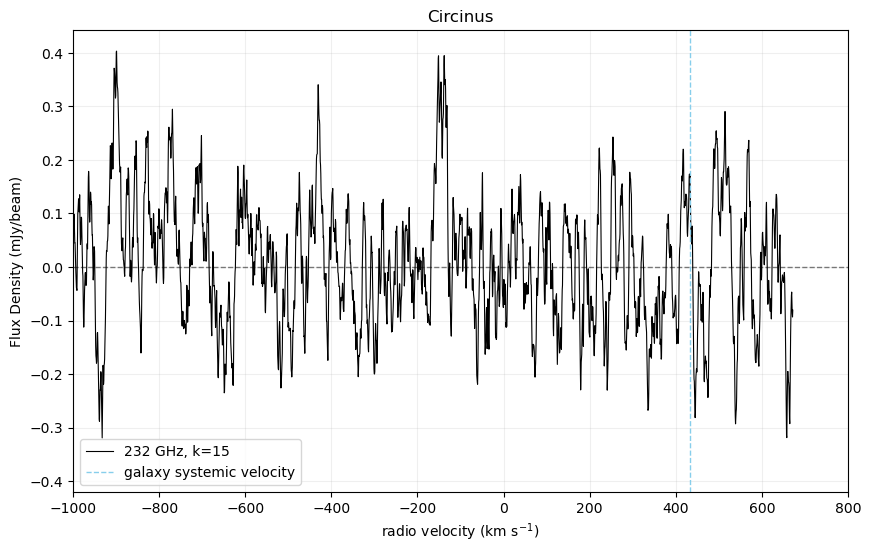

In [64]:
v_radio_232_binned, b_binned = rebin_spectrum(v_radio_232, b, bin_size=1)
b_binned_boxcar = boxcar_smooth(b_binned, kernel_size=18)

plt.figure(figsize=(10, 6))
plt.plot(v_radio_232_binned + 434, b_binned_boxcar, color="black", linewidth=0.8, label="232 GHz, k=15")
plt.xlabel("radio velocity (km s$^{-1}$)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("Circinus")
plt.xlim(-1000,800)
#plt.ylim(-100,300) 
plt.axhline(0, color="black", linewidth=1, linestyle="--", alpha=0.5)
plt.axvline(433.7, color="skyblue", linewidth=1, linestyle="--", alpha=1, label="galaxy systemic velocity" )
plt.grid(True, alpha=0.2)
plt.legend()

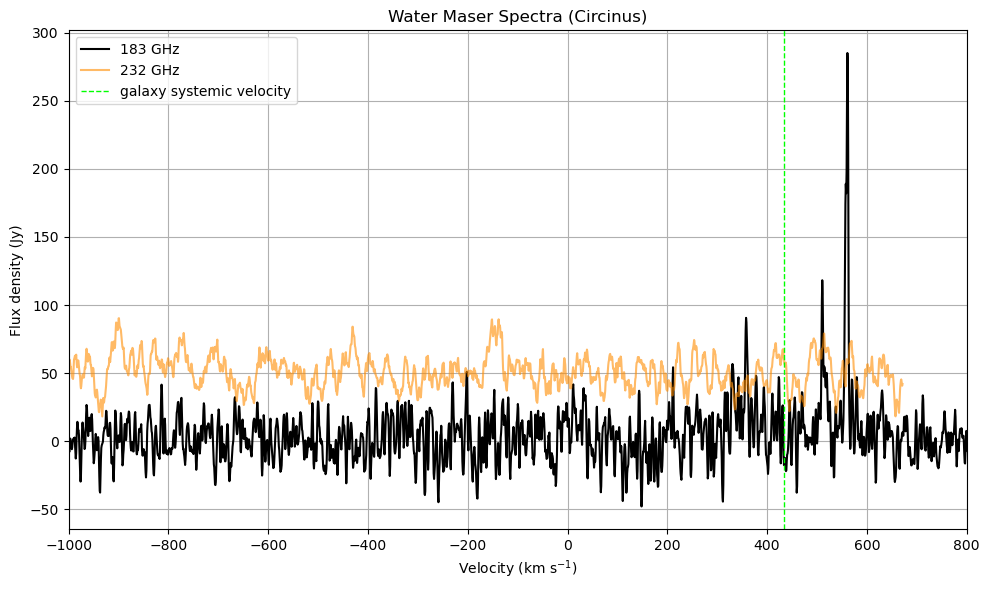

In [72]:
# 好真的要疊圖了(183GHz+232GHz)
v_radio_galaxy_183 = v_radio_183_binned + 433.7
v_radio_galaxy_232 = v_radio_232_binned + 433.7

plt.figure(figsize=(10, 6))
plt.plot(v_radio_galaxy_183, y_binned_boxcar, label="183 GHz", color="black")
plt.plot(v_radio_galaxy_232, b_binned_boxcar * 100 + 50, label="232 GHz", color="darkorange", alpha=0.6)
plt.axvline(433.7, color="lime", linewidth=1, linestyle="--", alpha=1, label="galaxy systemic velocity" )
plt.xlabel("Velocity (km s$^{-1}$)")
plt.ylabel("Flux density (Jy)")
plt.title("Water Maser Spectra (Circinus)")
plt.legend()
plt.grid(True)
plt.xlim(-1000, 800)
plt.tight_layout()
plt.show()

#好吧看起來對不上, 232的三坨超弱而且差太遠了

In [ ]:
'''
以下為紅魚貼心註解
#if you need to binning + boxcar smoothing

x_binned, y_binned = rebin_spectrum(x, y, bin_size=    )
y_binned_boxcar = boxcar_smooth(y_binned, kernel_size=    )

plt.figure(figsize=(8, 4))
plt.plot(x_binned, y_binned_boxcar, color="black", linewidth=1, label="binning(b=    )+Boxcar (k=    )")
for freq, label in my_lines:
    plt.axvline(freq, color="red", linestyle="-", alpha=0.6)
    plt.text(freq, max(y_binned_boxcar)*-0.1, label, rotation=90, color="red", fontsize=10, ha='right', va='top')
#for freq, label in template_lines:
#    plt.axvline(freq, color="blue", linestyle="-", alpha=0.6)
#    plt.text(freq, max(df[df.columns[1]])*-0.1, label, rotation=90, color="blue", fontsize=10, ha='right', va='top')  
plt.xlabel("frequency (GHz)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("    ")
plt.xlim(    ,     )
#plt.ylim(    ,     )
plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.grid(True, alpha=0.2)
plt.legend()

'''

'''
#if you just need boxcar smoothing

y_boxcar = boxcar_smooth(y, kernel_size= )

plt.figure(figsize=(8, 4))
plt.plot(x, y_boxcar, color="black", linewidth=1, label="Boxcar (k=    )")
for freq, label in my_lines:
    plt.axvline(freq, color="red", linestyle="-", alpha=0.6)
    plt.text(freq, max(y_boxcar)*-0.1, label, rotation=90, color="red", fontsize=10, ha='right', va='top')
#for freq, label in template_lines:
#    plt.axvline(freq, color="blue", linestyle="-", alpha=0.6)
#    plt.text(freq, max(df[df.columns[1]])*-0.1, label, rotation=90, color="blue", fontsize=10, ha='right', va='top')  
plt.xlabel("frequency (GHz)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("    ")
#plt.xlim(    ,     )
#plt.ylim(    ,     )
plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.grid(True, alpha=0.2)
plt.legend()
'''

'\n#if you just need boxcar smoothing\n\ny_boxcar = boxcar_smooth(y, kernel_size= )\n\nplt.figure(figsize=(8, 4))\nplt.plot(x, y_boxcar, color="black", linewidth=1, label="Boxcar (k=    )")\nfor freq, label in my_lines:\n    plt.axvline(freq, color="red", linestyle="-", alpha=0.6)\n    plt.text(freq, max(y_boxcar)*-0.1, label, rotation=90, color="red", fontsize=10, ha=\'right\', va=\'top\')\n#for freq, label in template_lines:\n#    plt.axvline(freq, color="blue", linestyle="-", alpha=0.6)\n#    plt.text(freq, max(df[df.columns[1]])*-0.1, label, rotation=90, color="blue", fontsize=10, ha=\'right\', va=\'top\')  \nplt.xlabel("frequency (GHz)")\nplt.ylabel("Flux Density (mJy/beam)")\nplt.title("    ")\n#plt.xlim(    ,     )\n#plt.ylim(    ,     )\nplt.axhline(0, color="black", linewidth=1, linestyle="--")\nplt.grid(True, alpha=0.2)\nplt.legend()\n'